# Image Preprocessing of Real-Life Rock Paper Scissors Dataset

A VGG16 Convolutional Neural Network will be trained on Rock Paper Scissors (RPS) images from two datasets: 

- [2,892 CGI-generated 300x300-pixel RPS images](http://www.laurencemoroney.com/rock-paper-scissors-dataset/) created by [Laurence Moroney](laurencemoroney.com), and 


- [2,188 real-life 300x200-pixel RPS images](https://www.kaggle.com/drgfreeman/rockpaperscissors#README_rpc-cv-images.txt) created by Kaggle user: [drgfreeman](https://www.kaggle.com/drgfreeman)

In this notebook we will be attempting to make the `rps_RL` (real-life) image formats more like the `rps_CGI` (CGI-generated) images. 

In [1]:
# Importing the usual libraries 
import pandas as pd 
import numpy as np 
import cv2
import glob
import matplotlib.pyplot as plt 
%matplotlib inline

### The goal is to make these images: 

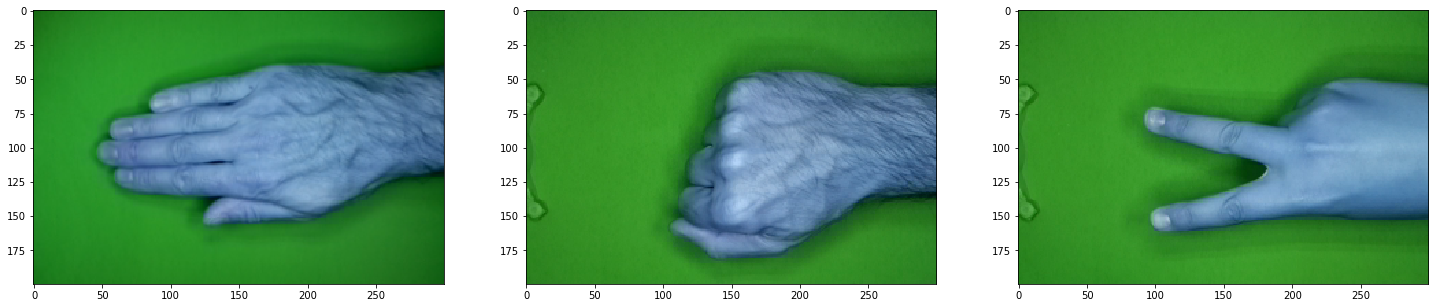

In [25]:
# rps_RL image example
RL_p = cv2.imread('rps_RL/paper/1jHtb93pI8f6pfKo.png', cv2.COLOR_BGR2RGB)
RL_r = cv2.imread('rps_RL/rock/0bioBZYFCXqJIulm.png', cv2.COLOR_BGR2RGB)
RL_s = cv2.imread('rps_RL/scissors/1L1n6plr7jlZGirw.png', cv2.COLOR_BGR2RGB)

# Display the images 
plt.subplots(1,3, figsize=(25,10))
# Paper example
plt.subplot(1,3,1)
plt.imshow(RL_p)
# Rock
plt.subplot(1,3,2)
plt.imshow(RL_r)
# Scissors
plt.subplot(1,3,3)
plt.imshow(RL_s)
plt.show()

### Look more like these images: 

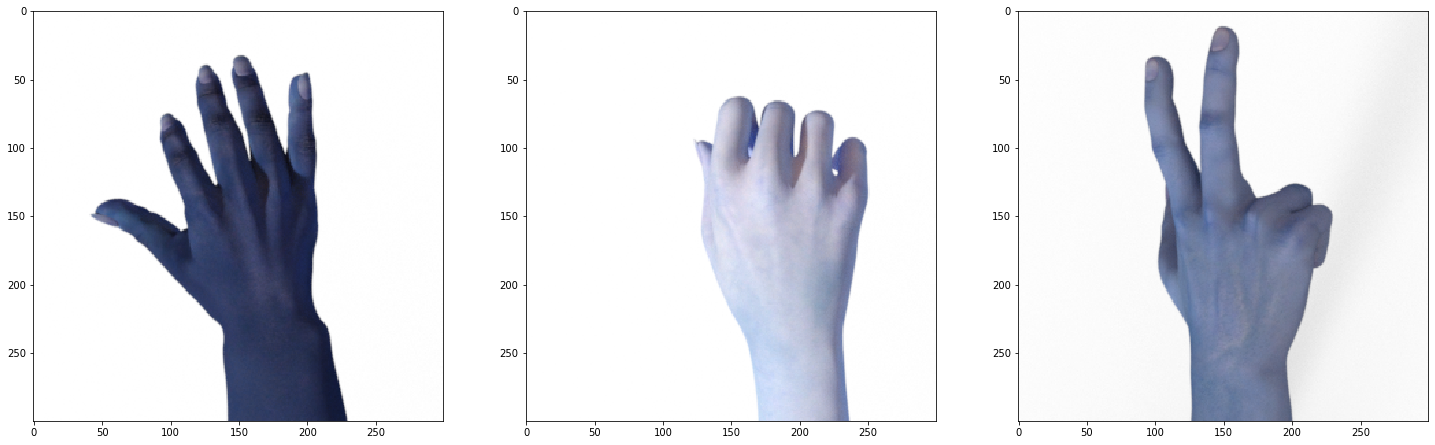

In [24]:
# rps_CGI image example
CGI_p = cv2.imread('rps_CGI/paper/paper03-097.png', cv2.COLOR_BGR2RGB)
CGI_r = cv2.imread('rps_CGI/rock/rock01-075.png', cv2.COLOR_BGR2RGB)
CGI_s = cv2.imread('rps_CGI/scissors/scissors03-108.png', cv2.COLOR_BGR2RGB)

# Display the images 
plt.subplots(1,3, figsize=(25,10))
# Paper example
plt.subplot(1,3,1)
plt.imshow(CGI_p)
# Rock
plt.subplot(1,3,2)
plt.imshow(CGI_r)
# Scissors
plt.subplot(1,3,3)
plt.imshow(CGI_s)
plt.show()

### By: 

- Replacing the green with a white background


- Resizing from **300W by 200H** to **300W by 300H** (while maintaining image aspect ratio) 


- Rotating the image 90 degrees clockwise
------

First, we will carry out the preprocessing steps on an example image. 

In [2]:
# Saving the directory names (class_names) to a list
class_names = ['paper','rock','scissors']

# Sanity check 
class_names

['paper', 'rock', 'scissors']

In [3]:
# Getting the path to an example image  
class_paths = glob.glob(f'rps_RL/{class_names[2]}/*.png')
ex_s_path = class_paths[0]

# Sanity check 
ex_s_path

'rps_RL/scissors\\0657zSfiTYzP2jrl.png'

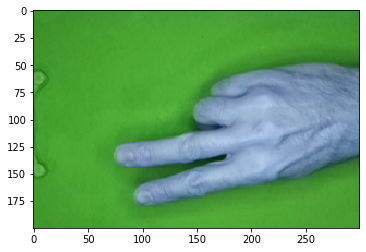

In [4]:
# Reading in the example image in RGB format using Open CV 
# Saving to variable 'ex_s'
ex_s = cv2.imread(ex_s_path, cv2.COLOR_BGR2RGB)

# Display the image 
plt.figure()
plt.imshow(ex_s)
plt.show()

In an effort to [replace the green background with a white background](https://stackoverflow.com/questions/58465783/how-to-set-background-color-on-image-to-white-with-opencv-in-python) we will attempt to `cv2.floodFill()` the connecting pixels starting from the image corners ([seedPoint](https://www.javatpoint.com/computer-graphics-flood-fill-algorithm)). 

`cv2.Canny()` edge detection output will be used as a `mask` to stop the floodFill at the hand outline. As per the `cv2.floodFill()` [documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=floodfill) the mask must be 2 pixels larger in width and height. 

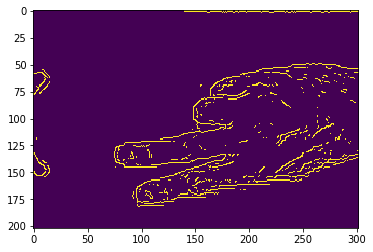

In [5]:
# Creating the mask for cv2.floodFill

# Using cv2.Canny() Edge Detection
edge_detect = cv2.Canny(ex_s, 100,100)

# Adding a 1-pixel border to the edge detection output 
add_border = cv2.copyMakeBorder(edge_detect,1,1,1,1,cv2.BORDER_REFLECT)

# Display the mask 
plt.figure()
plt.imshow(add_border)
plt.show()

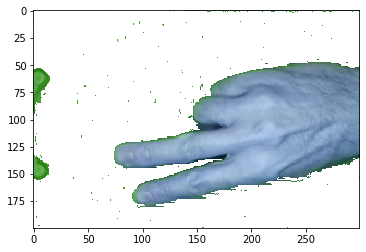

In [6]:
# Replace all neighbouring pixels that have similar RGB values as the 'seedPoint' pixel (starting point)
# with white, 'newVal' of (255,255,255)

# Make a copy of 'ex_s' to floodfill
filled = ex_s.copy()

# Setting seed points to the four corners
cv2.floodFill(image=filled, mask=add_border, seedPoint=(10,3), newVal=(255,255,255), 
              loDiff=(2,151,100), upDiff=(2,151,100), flags=8)
cv2.floodFill(filled, add_border, (10,197), (255,255,255), (2,151,100), (2,151,100), flags=8)
cv2.floodFill(filled, add_border, (299,3), (255,255,255), (2,151,65), (2,151,65), flags=8)
cv2.floodFill(filled, add_border, (299,197), (255,255,255), (2,151,65), (2,151,65), flags=8)


# Display the background-replaced image
plt.figure()
plt.imshow(filled)
plt.show()

Next, the image will be resized to 300 by 300 pixels where image aspect ratio will be upheld by [padding the image with white](https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/) `(255,255,255)`.  

Lastly, the resized image will be rotated 90 degrees clockwise.

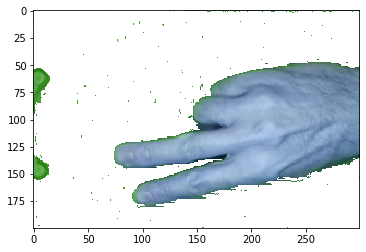

In [7]:
# Setting final_size as 300 by 300 
final_size = 300

# Getting the old_size of h=200 by w=300 (no channels)
original_size = filled.shape[:2] 

# Percent to scale by to preserve image aspect ratio
scale_percent = float(final_size)/max(original_size)

# Getting new image dimensions, note: (h, w) 
new_size = tuple([int(x*scale_percent) for x in original_size])

# Resize 'filled' image using new image dimensions 'new_size', requires (w, h)
resized = cv2.resize(filled, (new_size[1], new_size[0]))

# Display the resized image prior to adding white padding
plt.figure()
plt.imshow(resized)
plt.show()

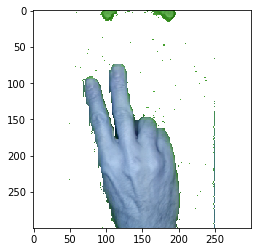

In [8]:
# Next, adding white padding (borders) to 'resized' to create a 200x200 'with_border' image

# Total border to add to image width-wise ('delta_w') and height-wise ('delta_h')
delta_w = final_size - new_size[1]
delta_h = final_size - new_size[0]
        
# Getting top border's height in pixels
top_border = delta_h//2
# Bottom border height
bottom_border = delta_h - top_border
# Getting left border's width in pixels
left_border = delta_w//2
# right border width
right_border = delta_w - left_border

# Brightness of border for all channels (white)
all_white = [255, 255, 255]
        
# Creating 'with_border' using above parameters 
with_border = cv2.copyMakeBorder(src=resized, top=top_border, bottom=bottom_border, left=left_border, 
                                 right=right_border, borderType=cv2.BORDER_CONSTANT, value=all_white)
        
# Lastly, rotate the image 
final_image = cv2.rotate(with_border, cv2.ROTATE_90_CLOCKWISE)

# Display the final_image
plt.figure()
plt.imshow(final_image)
plt.show()

## Putting it all together!

We will iterate through each image of each class, apply the above preprocessing steps and then save the prepared image to respective class directories in `rps_RL/training_set`. 

In [9]:
# Iterate through each class
for name in class_names: 
    
    # Getting a list of all the image paths for that class
    class_paths = glob.glob(f'rps_RL/{name}/*.png')
    
    # Creating an empty list that the image names will be appended to 
    image_names = [] 
    
    # Iterate through each path to isolate the image name
    for path in class_paths: 

        # Replace the path within the string with nothing  
        path_removed = path.replace(f'rps_RL/{name}\\','')
        
        # Replace the filetype within the remaining string with nothing
        ftype_removed = path_removed.replace('.png','')

        # Append the image name to 'image_names'
        image_names.append(ftype_removed)
    
    # Iterate through each image 
    for index in np.arange(0,len(class_paths)):
        
        # First, reading in the color image as RGB format
        read_image = cv2.imread(class_paths[index], cv2.COLOR_BGR2RGB)
        
        # Getting the old_size of h=200 by w=300 (no channels)
        original_size = read_image.shape[:2]
        
        # Next, replace the green background with white
        
        # Create an edge detection output 2 pixels larger in width and height as per cv2.floodFill documentation      
        detect_edge = cv2.Canny(read_image, 100, 100)
        edge_mask = cv2.copyMakeBorder(detect_edge,1,1,1,1,cv2.BORDER_REFLECT)

        # Create a copy of 'read_image' to floodFill
        filled = read_image.copy()
        
        # Replace all neighbouring pixels that have similar RGB values as the 'seedPoint' pixel (starting point)
        # with white, 'newVal' of (255,255,255)
        cv2.floodFill(image=filled, mask=edge_mask, seedPoint=(10,3), newVal=(255,255,255), 
                      loDiff=(2,151,100), upDiff=(2,151,100), flags=8)
        cv2.floodFill(filled, edge_mask, (10,197), (255,255,255), (2,151,100), (2,151,100), flags=8)
        cv2.floodFill(filled, edge_mask, (299,3), (255,255,255), (2,151,65), (2,151,65), flags=8)
        cv2.floodFill(filled, edge_mask, (299,197), (255,255,255), (2,151,65), (2,151,65), flags=8)


        # Next, resizing the image while preserving image aspect ratio
        
        # Percent to scale by to preserve image aspect ratio
        scale_percent = float(final_size)/max(original_size)
        # Getting new image dimensions, note: (h, w) 
        new_size = tuple([int(x*scale_percent) for x in original_size])

        # Resize 'filled' image using new image dimensions 'new_size', requires (w, h)
        resized = cv2.resize(filled, (new_size[1], new_size[0]))
        
        # Next, adding white padding (borders) to 'resized' to create a 200x200 'with_border' image

        # Total border to add to image width-wise ('delta_w') and height-wise ('delta_h')
        delta_w = final_size - new_size[1]
        delta_h = final_size - new_size[0]
        
        # Getting top border's height in pixels
        top_border = delta_h//2
        # Bottom border height
        bottom_border = delta_h - top_border
        # Getting left border's width in pixels
        left_border = delta_w//2
        # right border width
        right_border = delta_w - left_border

        # Brightness of border for all channels (white)
        all_white = [255, 255, 255]
        
        # Creating 'with_border' using above parameters 
        with_border = cv2.copyMakeBorder(src=resized, top=top_border, bottom=bottom_border, 
                                         left=left_border, right=right_border, 
                                         borderType=cv2.BORDER_CONSTANT, value=all_white)
        
        # Lastly, rotate the image 
        final_image = cv2.rotate(with_border, cv2.ROTATE_90_CLOCKWISE)

        # Save the image 
        status = cv2.imwrite(f'rps_RL/training_set/{name}/resize_{image_names[index]}.png', final_image)
        
        # Print a sanity check 
        print(f'{image_names[index]} resized, rotated and saved to "{name}" folder. ')     

04l5I8TqdzF9WDMJ resized, rotated and saved to "paper" folder. 
0a3UtNzl5Ll3sq8K resized, rotated and saved to "paper" folder. 
0cb6cVL8pkfi4wF6 resized, rotated and saved to "paper" folder. 
0eqArS2GgsBeqgSn resized, rotated and saved to "paper" folder. 
0Og76sl5CJhbxWWx resized, rotated and saved to "paper" folder. 
0RA9rcrv8iVvuDDU resized, rotated and saved to "paper" folder. 
0t08v9bAaA0mXGCQ resized, rotated and saved to "paper" folder. 
0Uomd0HvOB33m47I resized, rotated and saved to "paper" folder. 
0vugygEjxQJPr9yz resized, rotated and saved to "paper" folder. 
0zKU6wEhT2cDe9j0 resized, rotated and saved to "paper" folder. 
14K62H4KG1hg5qiJ resized, rotated and saved to "paper" folder. 
1Dfw5FRlS4h60JPX resized, rotated and saved to "paper" folder. 
1fKclJk4eBWOQSR1 resized, rotated and saved to "paper" folder. 
1Frbe8cdOdkciOBg resized, rotated and saved to "paper" folder. 
1jHtb93pI8f6pfKo resized, rotated and saved to "paper" folder. 
1oKnUgV2CdCaQUUX resized, rotated and sa

b8dw4ZOgMTx2h1xI resized, rotated and saved to "paper" folder. 
B9PzXQbhzehhxFRN resized, rotated and saved to "paper" folder. 
B9WSmSgclFPB3TOL resized, rotated and saved to "paper" folder. 
BbOoLEGslGMBu7sj resized, rotated and saved to "paper" folder. 
bddldJIGmQP5CSLD resized, rotated and saved to "paper" folder. 
BfFGJgByTJnxADwA resized, rotated and saved to "paper" folder. 
BH9zAUdmmjlfXwtS resized, rotated and saved to "paper" folder. 
BI9YnLkJ5wFZe6w8 resized, rotated and saved to "paper" folder. 
BLqL31aC5YLmx3uF resized, rotated and saved to "paper" folder. 
BoMfAmQYWtoiGHBV resized, rotated and saved to "paper" folder. 
BoXJ7o2SeSRRfuAH resized, rotated and saved to "paper" folder. 
bPTh8OjfiaJfzdcw resized, rotated and saved to "paper" folder. 
BqGdYFfhQ4sOU5Xl resized, rotated and saved to "paper" folder. 
bQO2dBIReHsgMCBi resized, rotated and saved to "paper" folder. 
BTG0fjXM09DyD4sh resized, rotated and saved to "paper" folder. 
bTurr7qf07hoPQu1 resized, rotated and sa

Httje79JB2p6ePf0 resized, rotated and saved to "paper" folder. 
hu3OxByp0O4KCJft resized, rotated and saved to "paper" folder. 
HU7Q4utMI0vHMxlh resized, rotated and saved to "paper" folder. 
hUDN2qXDxjoGBWqu resized, rotated and saved to "paper" folder. 
HuunhhoTMXTrST2Z resized, rotated and saved to "paper" folder. 
HvQdmFU7Qzd4SSQ4 resized, rotated and saved to "paper" folder. 
hWVwQVI74lc5zgyK resized, rotated and saved to "paper" folder. 
hxUxn67g42jOHGHi resized, rotated and saved to "paper" folder. 
HXxUlm3O2djcDgUR resized, rotated and saved to "paper" folder. 
HYIh5ipF4bN1futQ resized, rotated and saved to "paper" folder. 
HyLg8tH9blwT6eVy resized, rotated and saved to "paper" folder. 
i47BmmqwUa4y0jIP resized, rotated and saved to "paper" folder. 
ib30bLCbBl0mKWko resized, rotated and saved to "paper" folder. 
iGiF1suI8wXP6A2r resized, rotated and saved to "paper" folder. 
Ih5Z5Z3xFZ17IcZS resized, rotated and saved to "paper" folder. 
IkSLcJtq4O6iBmE4 resized, rotated and sa

ObnNNP8S6dH3IxIS resized, rotated and saved to "paper" folder. 
ocaU2HmemX7rmjm0 resized, rotated and saved to "paper" folder. 
OdfDTwgPVdW9XbE7 resized, rotated and saved to "paper" folder. 
OEFttKrmyc4bGb54 resized, rotated and saved to "paper" folder. 
OhkFvTOiBqphyG0I resized, rotated and saved to "paper" folder. 
oi2e7ny5y00NBLOx resized, rotated and saved to "paper" folder. 
oiJhtTsTDkiAcHeR resized, rotated and saved to "paper" folder. 
ojF0xyUvkvV3iujz resized, rotated and saved to "paper" folder. 
oJi50DvlvFg4wTio resized, rotated and saved to "paper" folder. 
OJpDyt2u6zzfoVP0 resized, rotated and saved to "paper" folder. 
oKx22gb6XjI0aXHR resized, rotated and saved to "paper" folder. 
oLcpS2BYyqZLBj9P resized, rotated and saved to "paper" folder. 
Om6b4BvZS49QNNFV resized, rotated and saved to "paper" folder. 
OMq2VJyb0KwtdwDc resized, rotated and saved to "paper" folder. 
oqJ2wJHOLMGGxdjF resized, rotated and saved to "paper" folder. 
orYuZ7NeWdENNt7D resized, rotated and sa

UHyVkisiFMmasl7b resized, rotated and saved to "paper" folder. 
UJdZdj6nyFRHVFEg resized, rotated and saved to "paper" folder. 
UJXhVbWUgUnzedxP resized, rotated and saved to "paper" folder. 
ukOGooYiFOfJHNrx resized, rotated and saved to "paper" folder. 
ul2wGK0NgJXs8mHv resized, rotated and saved to "paper" folder. 
UmipL2kv9TdDdryZ resized, rotated and saved to "paper" folder. 
UN3iCDyiEIteIMdx resized, rotated and saved to "paper" folder. 
Uok6jb9ObZxSWCDu resized, rotated and saved to "paper" folder. 
UOW45qbyvti8nBHV resized, rotated and saved to "paper" folder. 
uoYuyEHvVLrOOmqW resized, rotated and saved to "paper" folder. 
UQIJiOYi6zCaIeue resized, rotated and saved to "paper" folder. 
UqMn3TJPZRf0px46 resized, rotated and saved to "paper" folder. 
URj0hmH1Y9lNObL9 resized, rotated and saved to "paper" folder. 
UuF8mRQ3FDM6fOmp resized, rotated and saved to "paper" folder. 
UvFHqrnEwsrs6MgC resized, rotated and saved to "paper" folder. 
UVuauoFm9Pk5JJre resized, rotated and sa

1mnAKQCHEDbtjPX2 resized, rotated and saved to "rock" folder. 
1MOm36DHK0R8OfIC resized, rotated and saved to "rock" folder. 
1UucZqS3qblvU0cH resized, rotated and saved to "rock" folder. 
1UXuUYJ4rVj2eSvt resized, rotated and saved to "rock" folder. 
1VoYiUgPE6h45MLu resized, rotated and saved to "rock" folder. 
1vvcitV1s17gKdbn resized, rotated and saved to "rock" folder. 
1wk2Hl1Ih9guOwx6 resized, rotated and saved to "rock" folder. 
1WuMUpzupKs67q29 resized, rotated and saved to "rock" folder. 
2affjOmZChc9AXpR resized, rotated and saved to "rock" folder. 
2DdERUV7Te8ivywq resized, rotated and saved to "rock" folder. 
2EAkMCm7ZLnNoBQ7 resized, rotated and saved to "rock" folder. 
2f25VA1nfxiC86xj resized, rotated and saved to "rock" folder. 
2HSPQEteONUjEXAF resized, rotated and saved to "rock" folder. 
2j9iOcnxJzcyaFB5 resized, rotated and saved to "rock" folder. 
2JRYQXb5kmlhgD5i resized, rotated and saved to "rock" folder. 
2MKZD0VUw7Tez2Jx resized, rotated and saved to "rock" f

Bm9hYmhGUGmKxDwK resized, rotated and saved to "rock" folder. 
BMet9oI6hmx1zdc9 resized, rotated and saved to "rock" folder. 
bn4i63wrObqbJECw resized, rotated and saved to "rock" folder. 
BnnRzew7yA30gyts resized, rotated and saved to "rock" folder. 
boppgwG3Rz1zqCNK resized, rotated and saved to "rock" folder. 
BOswKcczxw8dC4kY resized, rotated and saved to "rock" folder. 
bqpOIN5gUl0r6vIS resized, rotated and saved to "rock" folder. 
BRCnAE1A7rvm7o8V resized, rotated and saved to "rock" folder. 
brPQ0E5Gk9L0FHey resized, rotated and saved to "rock" folder. 
brzyLjsQoGb8cmBe resized, rotated and saved to "rock" folder. 
bsj2s38rcZvedHSI resized, rotated and saved to "rock" folder. 
BSMMOAJotDbg08rj resized, rotated and saved to "rock" folder. 
BsWasfK2PdoRNEDw resized, rotated and saved to "rock" folder. 
bsXoToIcgrXUypd0 resized, rotated and saved to "rock" folder. 
BTcHjuerLAYWzx8S resized, rotated and saved to "rock" folder. 
bu8W5hPRULeRi0Kr resized, rotated and saved to "rock" f

H3USQGpRNkk6KyXa resized, rotated and saved to "rock" folder. 
H4DhPewFGkdWrc4A resized, rotated and saved to "rock" folder. 
H5UvLsMVpHQH2q0i resized, rotated and saved to "rock" folder. 
h89sRVkct1nAdPfo resized, rotated and saved to "rock" folder. 
H97IYAhAPk2kHnsI resized, rotated and saved to "rock" folder. 
hAcc7l7XQ9EtxxfR resized, rotated and saved to "rock" folder. 
HAz9geTMx5aynaaE resized, rotated and saved to "rock" folder. 
hfNIdhXfFcNcv37n resized, rotated and saved to "rock" folder. 
hfvXIbr96w55MAIz resized, rotated and saved to "rock" folder. 
HHXLX66BbEVNYl6W resized, rotated and saved to "rock" folder. 
hi4vWQhDFKyTs4iJ resized, rotated and saved to "rock" folder. 
HiWw0r0djGMscUQD resized, rotated and saved to "rock" folder. 
HLf2liRRQ2FM3PWB resized, rotated and saved to "rock" folder. 
hMqKoUYAvB91YRuO resized, rotated and saved to "rock" folder. 
hNKauGm372Z48JWy resized, rotated and saved to "rock" folder. 
HnWLgtGVbnoPAaMK resized, rotated and saved to "rock" f

muKpkJF3C3j0TmAN resized, rotated and saved to "rock" folder. 
MW1oWcAD7q1t0Ie6 resized, rotated and saved to "rock" folder. 
mwbC6miMP5CXTp3a resized, rotated and saved to "rock" folder. 
MwjRfqp6Gnh4vHI8 resized, rotated and saved to "rock" folder. 
Mwr4GgRRk6BgHDVL resized, rotated and saved to "rock" folder. 
N235Vnlue0M9SwaK resized, rotated and saved to "rock" folder. 
N3pHY9fO1y0jdeVu resized, rotated and saved to "rock" folder. 
N3Qml9f8reG31r5b resized, rotated and saved to "rock" folder. 
n3ryKsLTPcGhpW6S resized, rotated and saved to "rock" folder. 
N5RzLbTF6dlVDkbx resized, rotated and saved to "rock" folder. 
n61z73RnZB19Bpq8 resized, rotated and saved to "rock" folder. 
nb1DEYJBoJTVwG4K resized, rotated and saved to "rock" folder. 
ncO6qnqxGiA1sJrP resized, rotated and saved to "rock" folder. 
nGW6IQjCFT5tCw6j resized, rotated and saved to "rock" folder. 
NjO1nKIuSLnWpnK0 resized, rotated and saved to "rock" folder. 
nKBG8QSEBTwgkoVp resized, rotated and saved to "rock" f

s3NrOMdLJLZbpSdU resized, rotated and saved to "rock" folder. 
s89nGNUsKL1q4vtJ resized, rotated and saved to "rock" folder. 
S9iRciyZ0OktMu7s resized, rotated and saved to "rock" folder. 
sCkuAnI0vDucXt7m resized, rotated and saved to "rock" folder. 
sDLQgvDkWYW8qa8b resized, rotated and saved to "rock" folder. 
SDUe3SDAEKYJId8m resized, rotated and saved to "rock" folder. 
SE5eUJl8euX8gTJ3 resized, rotated and saved to "rock" folder. 
SEKWYxTtThyvg3UX resized, rotated and saved to "rock" folder. 
Shr7grl23ISlh4Yu resized, rotated and saved to "rock" folder. 
sKD8rWd2xMuZQl49 resized, rotated and saved to "rock" folder. 
SlAF95clUBus3B4a resized, rotated and saved to "rock" folder. 
smfqjL7LuLnrPqo1 resized, rotated and saved to "rock" folder. 
SNEJ1wGU1s9Dm3I1 resized, rotated and saved to "rock" folder. 
so3Om75mBnUfBdTe resized, rotated and saved to "rock" folder. 
sq8ppoxKFLEiWc1N resized, rotated and saved to "rock" folder. 
srlcv9vYJ9c9OUsC resized, rotated and saved to "rock" f

ZljuXHZdMhwFPe6H resized, rotated and saved to "rock" folder. 
zM2n6u50gHzL1i6i resized, rotated and saved to "rock" folder. 
ZM4bG569OHTj1XMT resized, rotated and saved to "rock" folder. 
zp7Okc8j1CJgB8ji resized, rotated and saved to "rock" folder. 
ZPRYcDY3SAyZigkB resized, rotated and saved to "rock" folder. 
zrrYLvM2uywyFwRy resized, rotated and saved to "rock" folder. 
ZUROGMkonFX6dWC9 resized, rotated and saved to "rock" folder. 
ZVYkpv1wvpH7lSDu resized, rotated and saved to "rock" folder. 
ZWKMxS1Yoa5ZvkOz resized, rotated and saved to "rock" folder. 
ZWrzVOGgkuKQRDnQ resized, rotated and saved to "rock" folder. 
Zyzp7nBCojgQeCZs resized, rotated and saved to "rock" folder. 
Zz52yCODsLplv7rK resized, rotated and saved to "rock" folder. 
zZRojXITRo7bAIRT resized, rotated and saved to "rock" folder. 
0657zSfiTYzP2jrl resized, rotated and saved to "scissors" folder. 
0CSaM2vL2cWX6Cay resized, rotated and saved to "scissors" folder. 
0ePX1wuCc3et7leL resized, rotated and saved to 

bI7SDSU3g7fZsxRM resized, rotated and saved to "scissors" folder. 
BJwCAwQV0EWaUT1X resized, rotated and saved to "scissors" folder. 
bLJSE1dl7VbQCUF9 resized, rotated and saved to "scissors" folder. 
bmlw6acW9500qauw resized, rotated and saved to "scissors" folder. 
BmVM7T7MvIkewekj resized, rotated and saved to "scissors" folder. 
bn7yju6XvU87slzH resized, rotated and saved to "scissors" folder. 
BpCDUnGgYRS4T8IG resized, rotated and saved to "scissors" folder. 
BtUfOjTzw9EEvNHO resized, rotated and saved to "scissors" folder. 
BwX4LCp8V8FlquK1 resized, rotated and saved to "scissors" folder. 
bzQcSRVP3M7abinD resized, rotated and saved to "scissors" folder. 
c5vx49tv1qUAH19T resized, rotated and saved to "scissors" folder. 
c9oqImbEKG7Ij1cO resized, rotated and saved to "scissors" folder. 
caj9PiWZ2BenuxXF resized, rotated and saved to "scissors" folder. 
cbGRRpm8EE2K6pDH resized, rotated and saved to "scissors" folder. 
cDveaur4dR2ZCCo8 resized, rotated and saved to "scissors" fold

hyQDSSjNFHX7Wirc resized, rotated and saved to "scissors" folder. 
hzfrafUqDDoL0esu resized, rotated and saved to "scissors" folder. 
hzvSpM4olIqXfeVt resized, rotated and saved to "scissors" folder. 
i0pYFjwidPeBL3je resized, rotated and saved to "scissors" folder. 
I17M0iKd7oKgMtDw resized, rotated and saved to "scissors" folder. 
i5CZnAPMNTZtM13A resized, rotated and saved to "scissors" folder. 
IBauM2TU1KmGhsfT resized, rotated and saved to "scissors" folder. 
IdrewaHdlHRrNHbJ resized, rotated and saved to "scissors" folder. 
IEE3kJIfbClsf54v resized, rotated and saved to "scissors" folder. 
IH5gpU7fLJSn90Rx resized, rotated and saved to "scissors" folder. 
ik80sIT0Ao6APY3M resized, rotated and saved to "scissors" folder. 
iM1hcJsC387vy9YA resized, rotated and saved to "scissors" folder. 
inP9wrbC4x26yBW9 resized, rotated and saved to "scissors" folder. 
IOa7xROJIqP2jRQE resized, rotated and saved to "scissors" folder. 
IqHedcZ3nrBRxpn6 resized, rotated and saved to "scissors" fold

o3uLvDdBwKBY9793 resized, rotated and saved to "scissors" folder. 
o6sFIzkVY4xKTgrH resized, rotated and saved to "scissors" folder. 
OA0s5AsfJEm96cxd resized, rotated and saved to "scissors" folder. 
od9zrr7aF0p8VPRM resized, rotated and saved to "scissors" folder. 
oDhw5SDj3rprGmyc resized, rotated and saved to "scissors" folder. 
oJHJKGs9EiSNQo1m resized, rotated and saved to "scissors" folder. 
oKkvmTaZN5M8MCyt resized, rotated and saved to "scissors" folder. 
OLBaBUjL8DE58OvS resized, rotated and saved to "scissors" folder. 
OLq5gEcrMDGftxeG resized, rotated and saved to "scissors" folder. 
oneWMcLqF5aVRqz8 resized, rotated and saved to "scissors" folder. 
oNZAuH1gIa65iSMu resized, rotated and saved to "scissors" folder. 
Osm4O4K7sdFOSiRk resized, rotated and saved to "scissors" folder. 
otBEUIQNFGMk80vF resized, rotated and saved to "scissors" folder. 
OvlZhZPWYPjouJIM resized, rotated and saved to "scissors" folder. 
OWzxS6m9SGpk1bnY resized, rotated and saved to "scissors" fold

tZ8TlcDUMWqENtfF resized, rotated and saved to "scissors" folder. 
tZYSEIgQN7PZ31tk resized, rotated and saved to "scissors" folder. 
U548QDFNMOTUq5nN resized, rotated and saved to "scissors" folder. 
U6bMgGB3gf9rMBvE resized, rotated and saved to "scissors" folder. 
UAaPcdGxSdKJngGc resized, rotated and saved to "scissors" folder. 
uCRRTGuvPMUiZXYz resized, rotated and saved to "scissors" folder. 
UDihI8vQDjvGJRjO resized, rotated and saved to "scissors" folder. 
uFQ3SN5QxNyXoBmx resized, rotated and saved to "scissors" folder. 
uI2O1DwI1nIIx9Qu resized, rotated and saved to "scissors" folder. 
uJ286TPihhYw3Y3S resized, rotated and saved to "scissors" folder. 
UJ5WJEvN4vQ86HKA resized, rotated and saved to "scissors" folder. 
ukg3QI26FUEa7YDn resized, rotated and saved to "scissors" folder. 
UlvWQ1fnwQeGYNTa resized, rotated and saved to "scissors" folder. 
uM6obPsz0ALWxBjQ resized, rotated and saved to "scissors" folder. 
UmpmKO5O9ku8kBwj resized, rotated and saved to "scissors" fold

The next step will be to combined the `rps_RL` and `rps_CGI` datasets and create a test set of images using the `combined_test.sh` script. 

It should be noted that the `rps_CGI` included a test set containing ~10% of the dataset's images. 

Thus, 10% of the preprocessed `rps_RL` images will also be moved to the test set to make up a total test size of ~20%. 